## POCS  
###### Author: Zimu Huo
###### Date: 05.2022

-------------------------------------------------------------------------
References
    
    [1] 
    Author: G McGibney et al.
    Title: Quantitative evaluation of several partial Fourier reconstruction algorithms used in MRI
    Link: https://pubmed.ncbi.nlm.nih.gov/8371675/
    
   

In [3]:
import sys
sys.path.insert(1, '../')
import matplotlib.pyplot as plt
import util.coil as coil
from util.fft import *
import numpy as np
import util.mask as undersample
import util.io as io
import util.simulator as simulate
from numpy import linalg
from util.zpad import *
from tqdm.notebook import tqdm
from util.partialFourier import *

In [4]:
data = np.load("../lib/slice1_grappa1.npy")
[ny,nx,nc] = data.shape

In [5]:
dataR = data * undersample.partialFourier(data.shape, 0.7)
calib = simulate.acs(dataR,(64, 256))
calib = zpad3(calib)

In [6]:
recon = np.zeros(dataR.shape, dtype = complex)
for c in tqdm(range(nc)):
    recon[...,c] = pocs(dataR[...,c], calib[...,c])

  0%|          | 0/34 [00:00<?, ?it/s]

/var/folders/5d/6p36mvb505x5j7b_90jtxdsr0000gn/T/ipykernel_37801/1268481095.py:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(coil.rsos((dataR)))),cmap='gray')


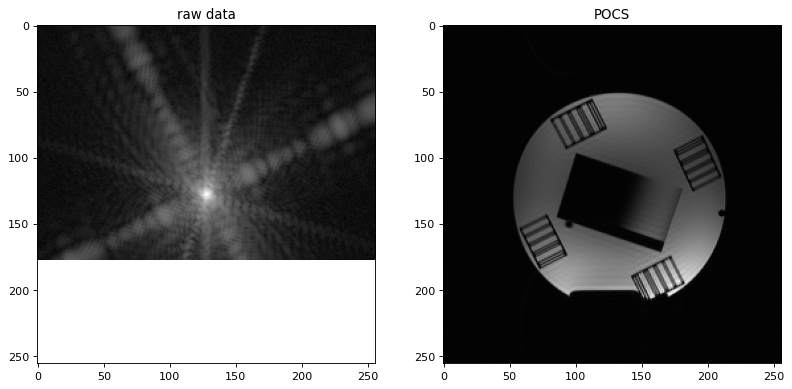

In [8]:
plt.figure(figsize=(12, 8), dpi=80)
plt.subplot(121)
plt.title("raw data")
plt.imshow(np.log(np.abs(coil.rsos((dataR)))),cmap='gray')
plt.subplot(122)
plt.title("POCS")
plt.imshow(np.abs(coil.rsos(recon)),cmap = 'gray')
plt.show()